In [157]:
import cv2
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import heapq
import xlsxwriter


In [100]:
mat = scipy.io.loadmat('/home/peppermint/Desktop/Patients/000-001/Gas_Exchange/000001_highBW.mat')

In [101]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bar2gas_binning', 'scan_date', 'KCO_map', 'FOV', 'rbc2gas_binning', 'bandwidth', 'mask_lobar', 'gas_biasfield', 'gas_highreso', 'gas_highSNR', 'data_dir', 'ventilation', 'RBC2barrier', 'stats_box', 'lobar_stats_ave', 'TE90', 'barrier', 'rbc2gas', 'Subject_ID', 'ute_reg', 'mask_reg_vent', 'ven_binning', 'gas_highreso_cor', 'lobar_stats_all', 'ute', 'mask', 'dissolved', 'bar2gas', 'rbc', 'KCO_binning', 'mask_reg'])

In [102]:
bar2gas = mat['bar2gas']
mask_reg = mat['mask_reg']

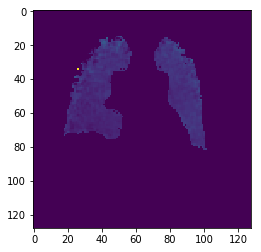

In [103]:
plt.imshow(bar2gas[:,:,50])

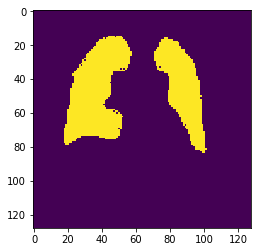

In [104]:
plt.imshow(mask_reg[:,:,50])

In [33]:
img= bar2gas[:,:,50];

In [86]:
np.max(mask_reg[:,:,50])

1

In [37]:
num_labels, labels_im = cv2.connectedComponents(mask_reg[:,:,50])

In [48]:
output=cv2.connectedComponentsWithStats(mask_reg[:,:,50],4)

In [9]:

# Dont run this it will error

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2.imshow('labeled.png', labeled_img)
    

imshow_components(labels_im)

In [11]:
sum(sum(labels_im==1))

1531

In [12]:
sum(sum(labels_im==2))

1003

In [13]:
sum(sum(labels_im==0))

13850

In [38]:
extract_label = np.zeros(labels_im.shape);
extract_label[labels_im==2]=1;

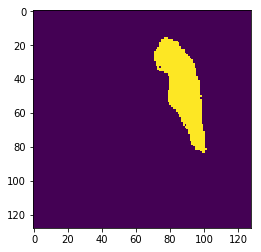

In [39]:
plt.imshow(extract_label)

In [19]:
dist_transform = cv2.distanceTransform(mask_reg[:,:,50],cv2.DIST_L2,3)

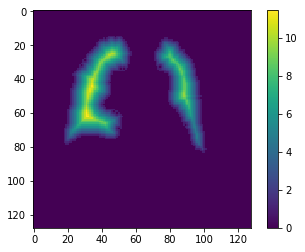

In [21]:
plt.imshow(dist_transform )
plt.colorbar()

In [57]:
centroid=output[3];
centroid

array([[64.71703971, 66.57205776],
       [36.81645983, 47.49379491],
       [87.42472582, 45.5114656 ]])

In [60]:
stats=output[2];
stats

array([[    0,     0,   128,   128, 13850],
       [   18,    15,    40,    64,  1531],
       [   71,    16,    31,    68,  1003]], dtype=int32)

In [67]:
area=stats[:,4];
# Delete the background label.
area=area[1:]

In [76]:
index_label=np.array(heapq.nlargest(2, range(len(area)), key=area.__getitem__))+1;
index_label

array([1, 2])

In [77]:
index_1 = index_label[0]
index_2 = index_label[1]
if (centroid[index_1,0]<centroid[index_2,0]):
    left_label=index_1;
    right_label=index_2;
else:
    left_label=index_2;
    right_label=index_1;
    

In [79]:
left_label

1

In [78]:
labels_im = output[1];

In [132]:
[m,n] = img.shape
sum_left_out=0;
sum_right_out=0;
sum_left_in=0;
sum_right_in=0;

num_left_out=0;
num_right_out=0;
num_left_in=0;
num_right_in=0;

for i in range(m):
    for j in range(n):
        
        if(labels_im[i,j]==left_label ):
            
            if((dist_transform[i,j]>0 and dist_transform[i,j]<=4)):
                sum_left_in = sum_left_in+ img[i,j];
                num_left_in= num_left_in+1;
            else:
                sum_left_out = sum_left_out+ img[i,j];
                num_left_out= num_left_out+1;
            
            
        elif (labels_im[i,j]==right_label):
            
            if((dist_transform[i,j]>0 and dist_transform[i,j]<=4)):
                sum_right_in = sum_right_in+ img[i,j];
                num_right_in= num_right_in+1;
            else:
                sum_right_out = sum_right_out+ img[i,j];
                num_right_out= num_right_out+1;
            
            
mean=[sum_left_in/num_left_in,sum_left_out/num_left_out,sum_right_in/num_right_in,sum_right_out/num_right_out]       

In [133]:
mean

[0.39723450145471717,
 0.4699914438228087,
 0.5666162351611698,
 0.5802311563184979]

0


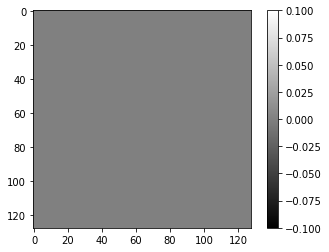

0


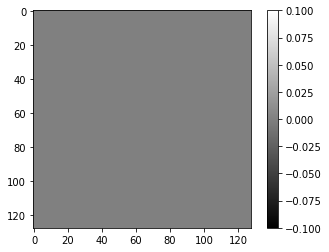

0


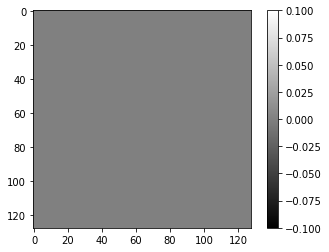

0


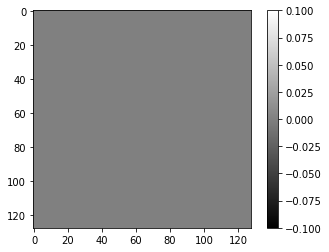

0


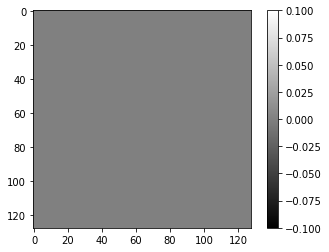

0


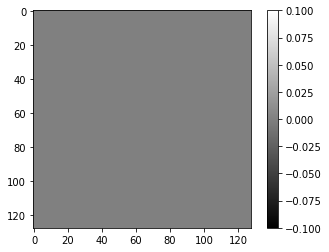

0


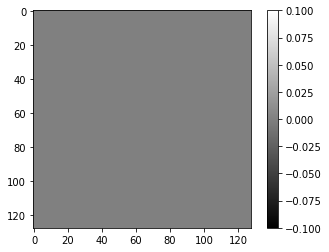

0


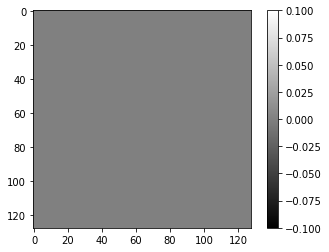

0


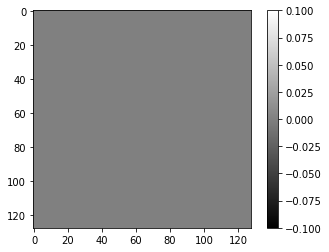

0


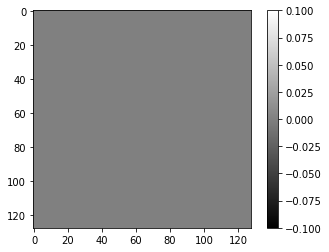

0


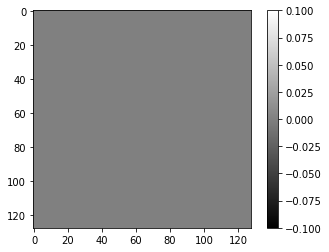

0


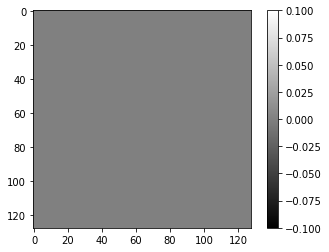

0


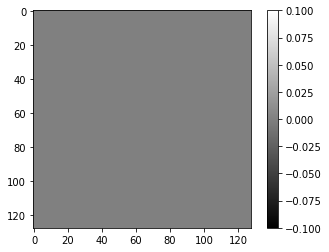

0


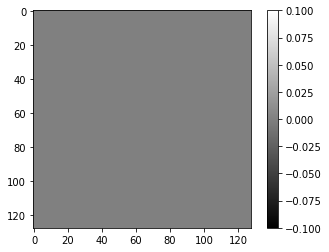

0


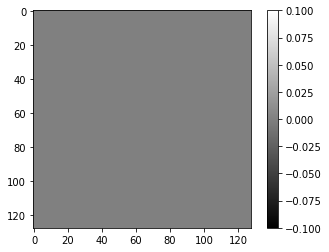

0


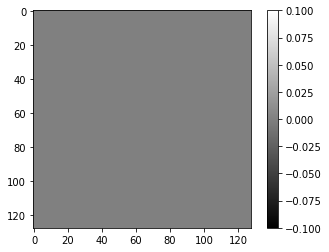

0


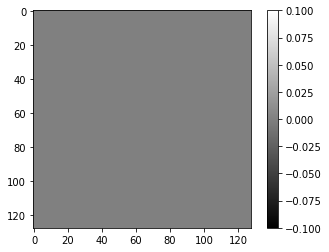

0


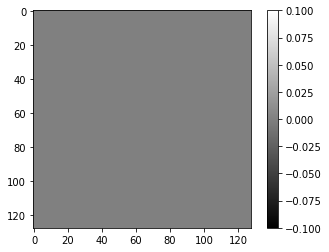

0


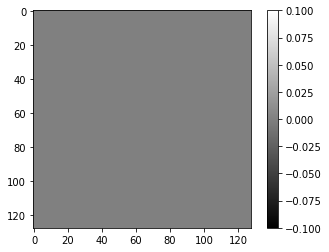

0


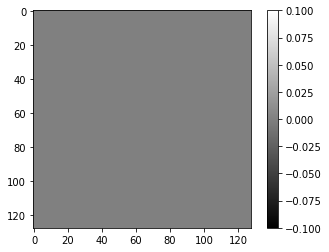

0


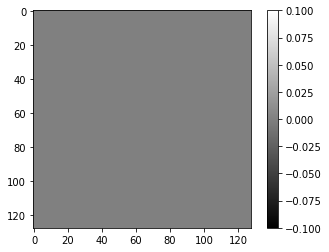

0


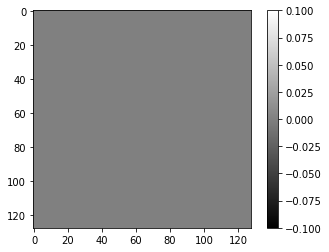

0


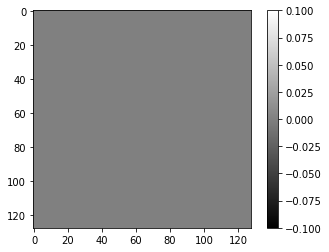

0


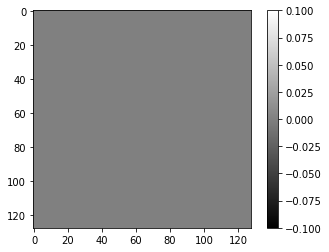

0


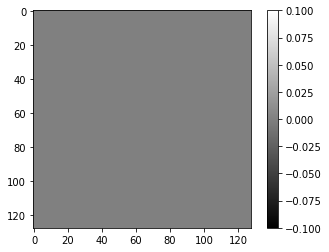

0


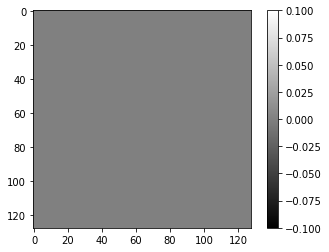

6


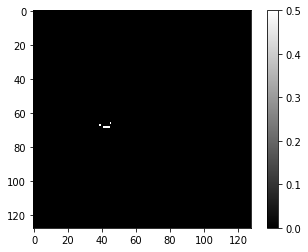

79


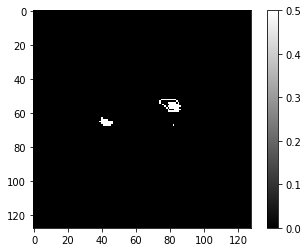

366


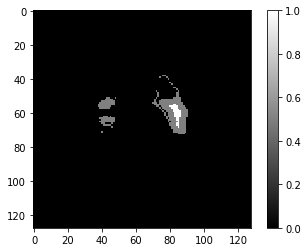

884


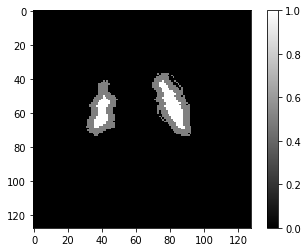

1193


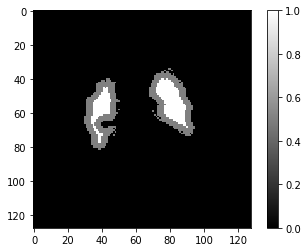

1529


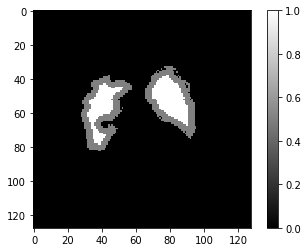

1824


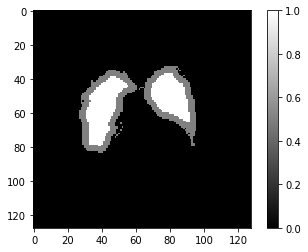

2028


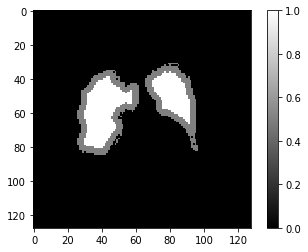

2165


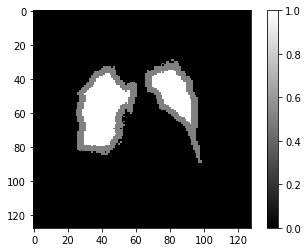

2276


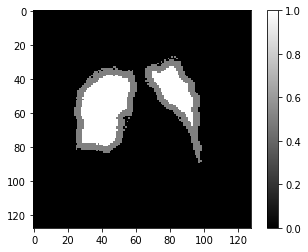

2356


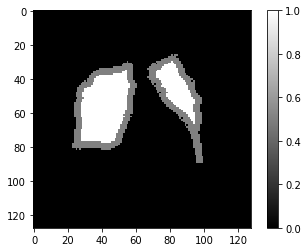

2419


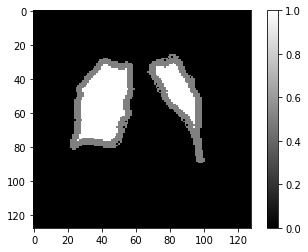

2430


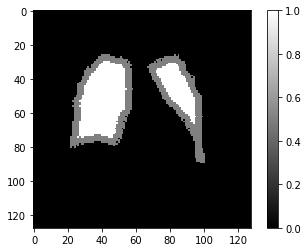

2434


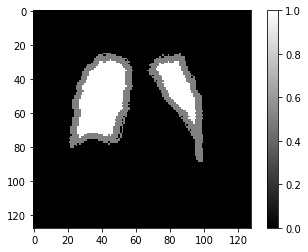

2456


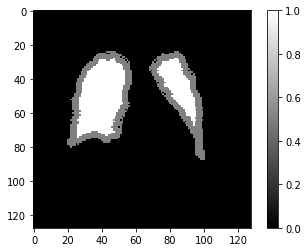

2408


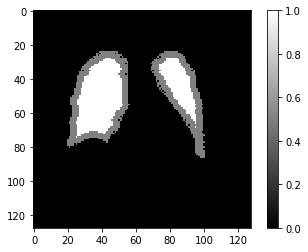

2374


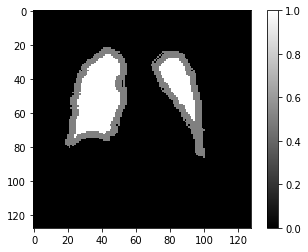

2367


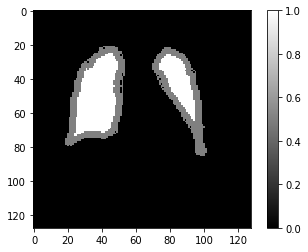

2374


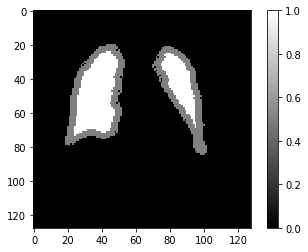

2385


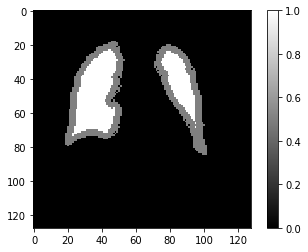

2429


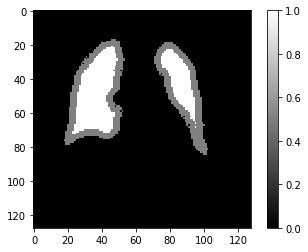

2455


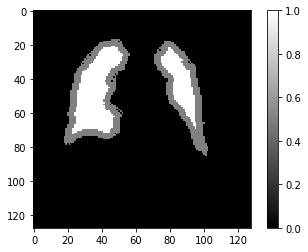

2475


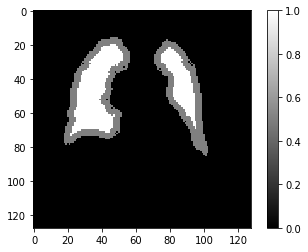

2501


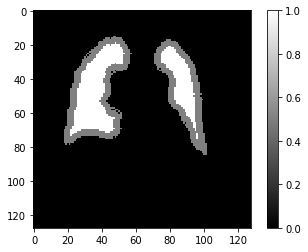

2534


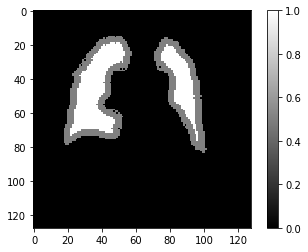

2493


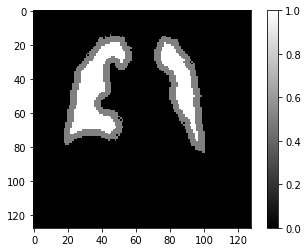

2457


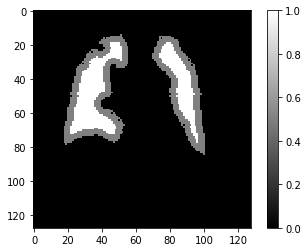

2516


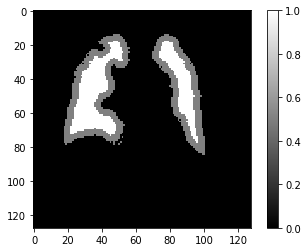

2701


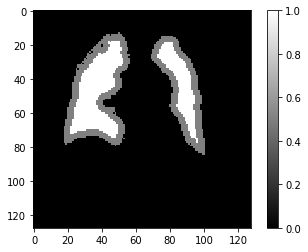

2726


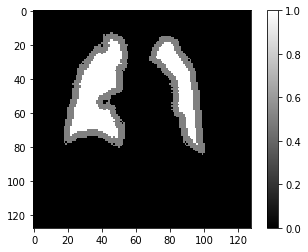

2794


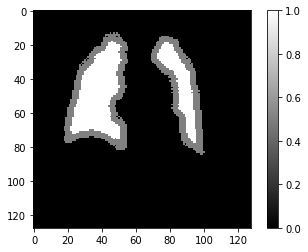

2765


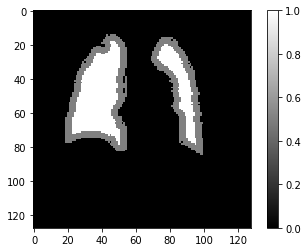

2700


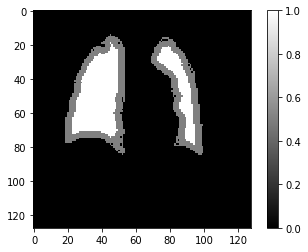

2596


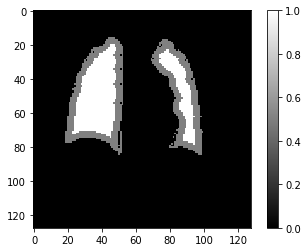

2478


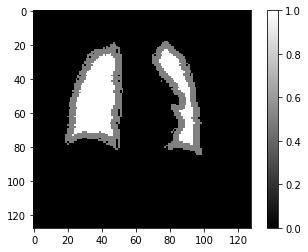

2421


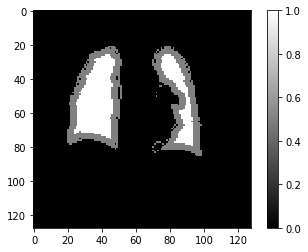

2437


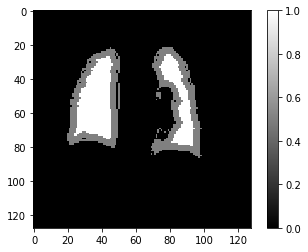

2427


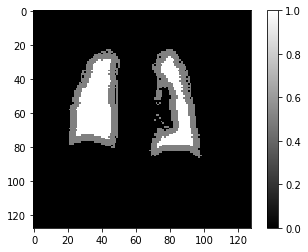

2404


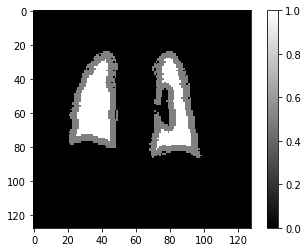

2314


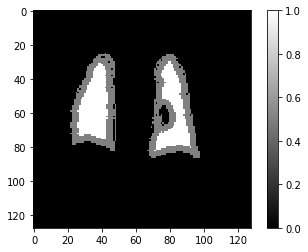

2255


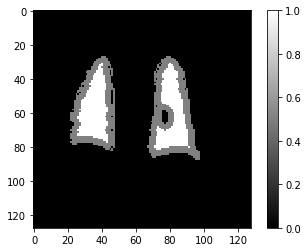

2138


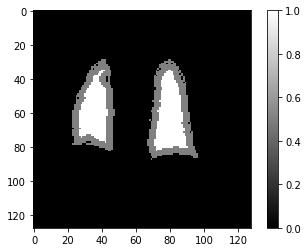

2032


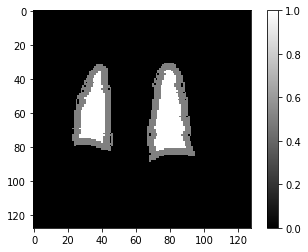

1916


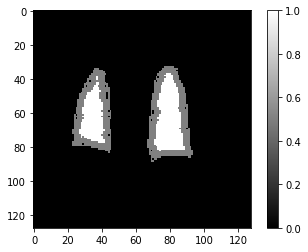

1730


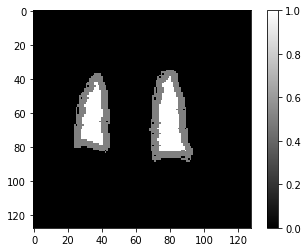

1560


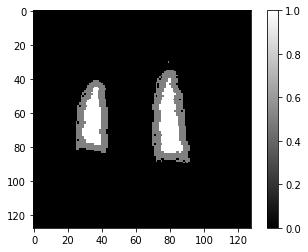

1416


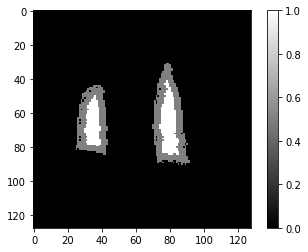

1252


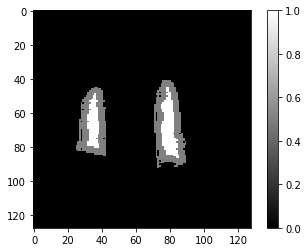

1077


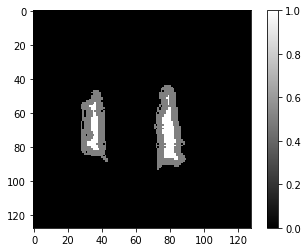

829


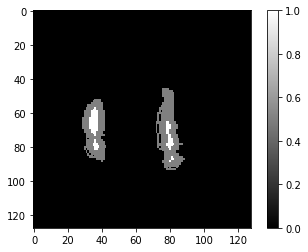

549


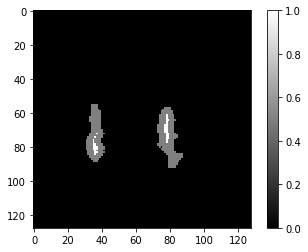

58


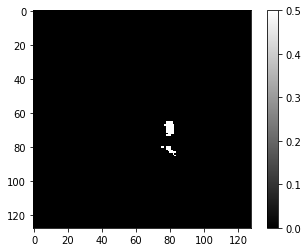

0


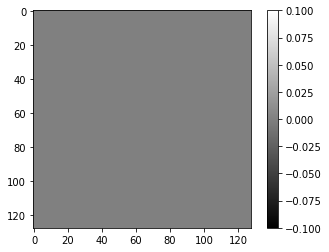

0


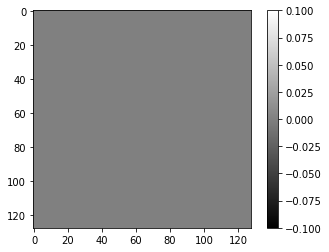

0


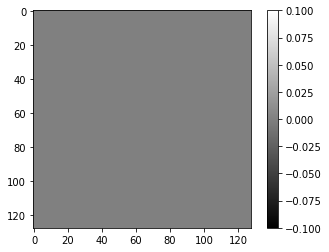

0


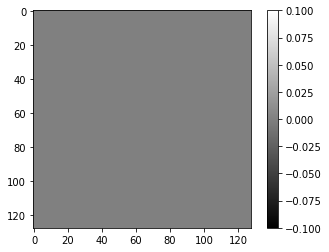

0


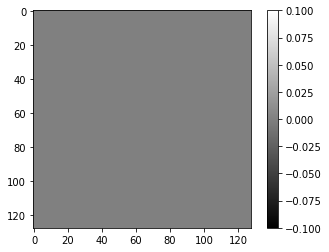

0


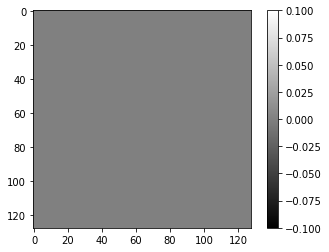

0


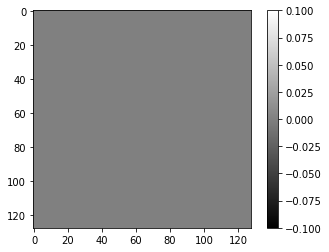

0


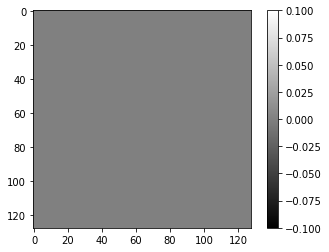

0


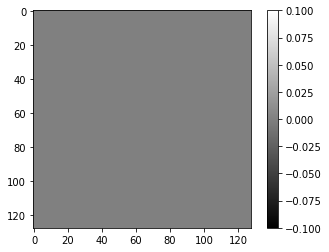

0


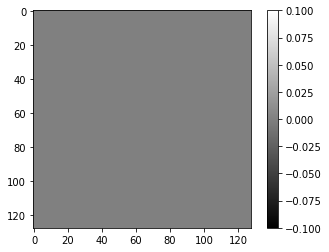

0


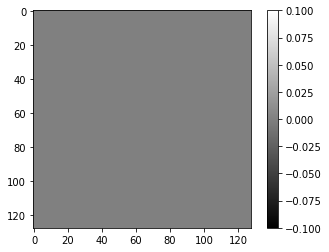

0


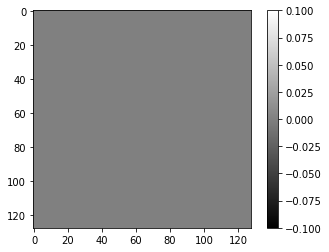

0


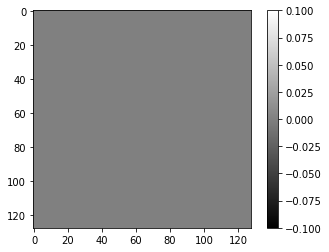

0


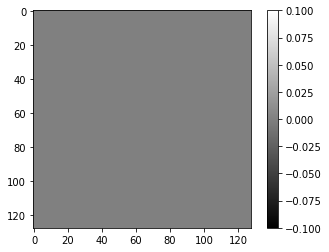

0


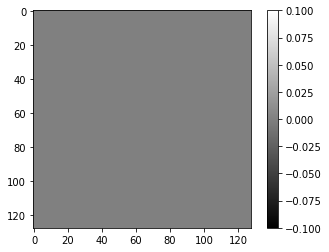

0


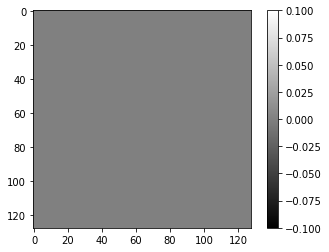

0


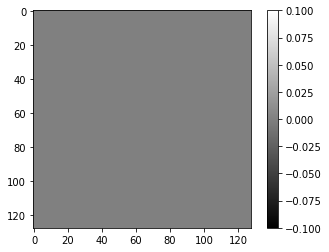

0


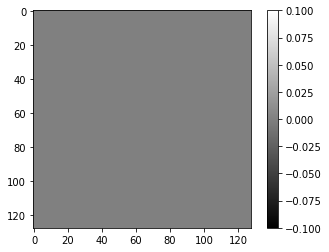

0


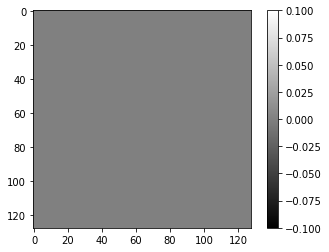

0


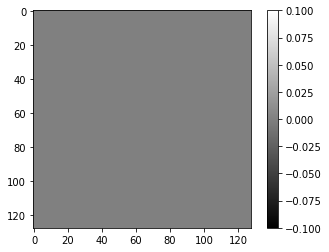

0


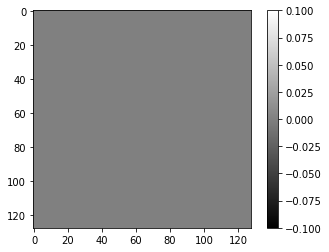

0


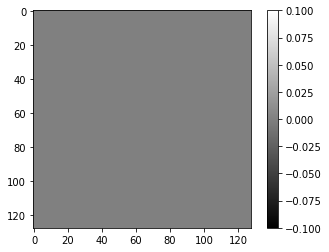

0


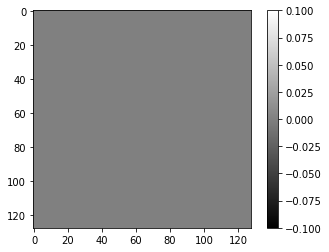

0


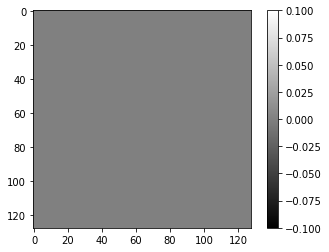

0


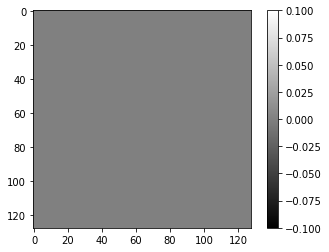

0


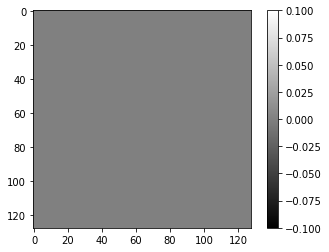

0


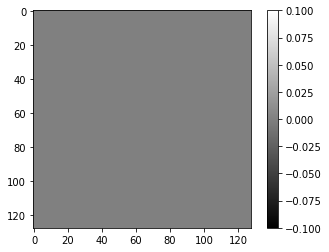

0


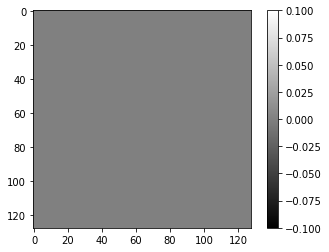

0


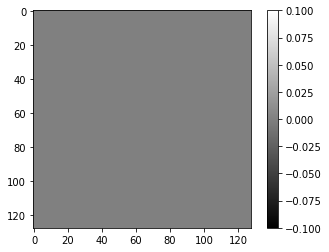

0


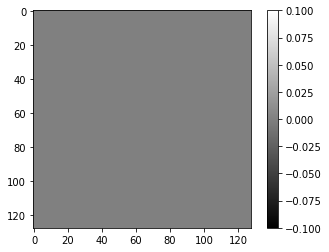

0


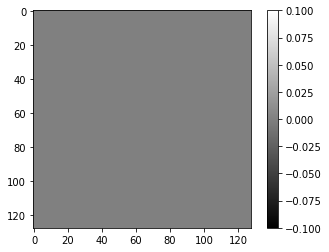

0


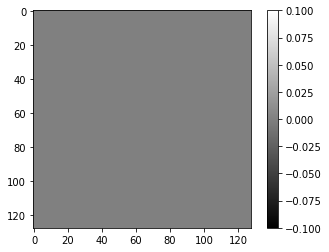

0


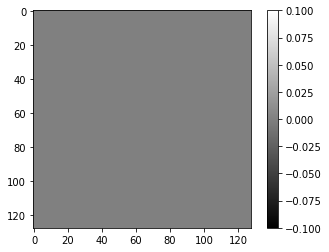

0


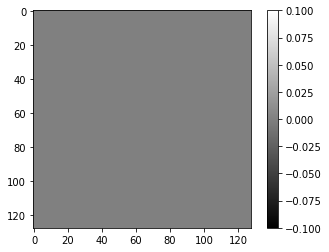

0


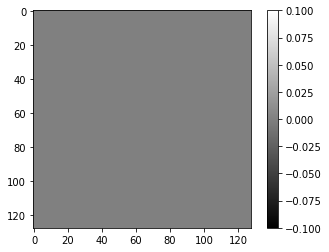

0


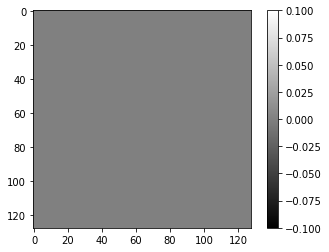

0


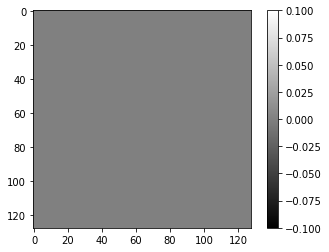

0


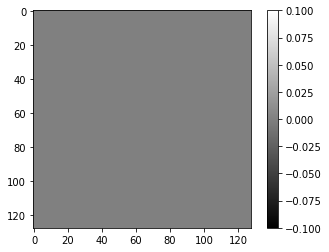

0


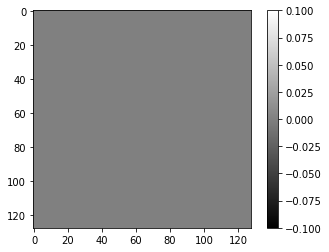

0


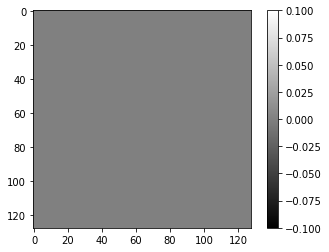

0


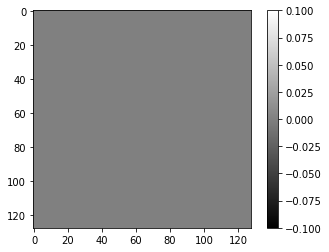

0


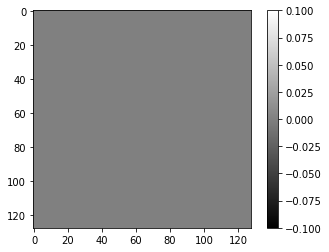

0


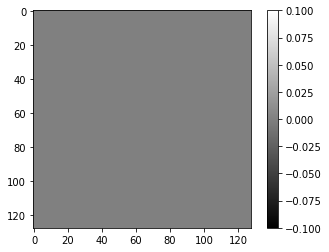

0


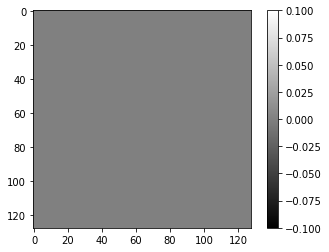

0


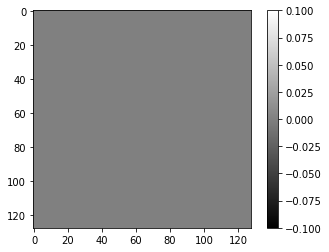

0


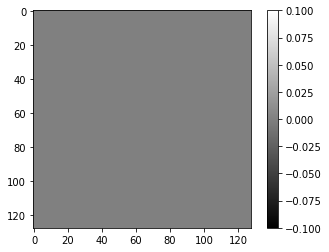

0


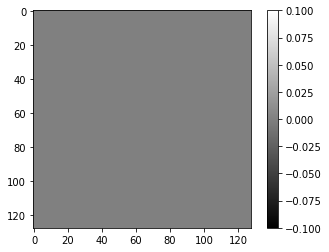

0


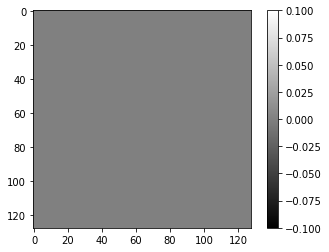

0


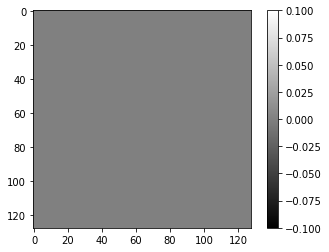

0


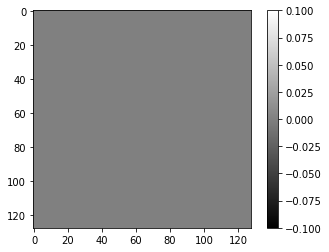

In [137]:
for i in range(128):
    m=mask_reg[:,:,i].copy();
    m=m.astype(np.float)
    dist_transform = cv2.distanceTransform(mask_reg[:,:,i],cv2.DIST_L2,3)
    m[(dist_transform>0) & (dist_transform<=4)]=0.5
    print(sum(sum(mask_reg[:,:,i])))
    plt.imshow(m, cmap='gray')
    plt.colorbar()
    plt.show()

In [127]:
m[:,40]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [ ]:
### Clean code Now Hopefully

In [259]:
# load data
mat = scipy.io.loadmat('/home/peppermint/Desktop/Patients/000-001/Gas_Exchange/000001_highBW.mat')
bar2gas = mat['bar2gas']
mask_reg = mat['mask_reg']
total_mean=[];
for i in range(128):
    if(sum(sum(mask_reg[:,:,i]))>=2000):
        img=bar2gas[:,:,i];

        output=cv2.connectedComponentsWithStats(mask_reg[:,:,i],4)

        labels_im = output[1];
        stats=output[2];
        centroid=output[3];

        area=stats[:,4];
        # Delete the background label.
        area=area[1:]

        #Choose the label with largest and second largest except backgrounf
        index_label=np.array(heapq.nlargest(2, range(len(area)), key=area.__getitem__))+1;

        # Find which is left or right
        index_1 = index_label[0]
        index_2 = index_label[1]
        if (centroid[index_1,0]<centroid[index_2,0]):
            left_label=index_1;
            right_label=index_2;
        else:
            left_label=index_2;
            right_label=index_1;

        # Instant of Do morphology we create distance image 

        dist_transform = cv2.distanceTransform(mask_reg[:,:,i],cv2.DIST_L2,3)
        [m,n] = img.shape
        sum_left_out=0;
        sum_right_out=0;
        sum_left_in=0;
        sum_right_in=0;

        num_left_out=0;
        num_right_out=0;
        num_left_in=0;
        num_right_in=0;

        for i in range(m):
            for j in range(n):

                if(labels_im[i,j]==left_label ):

                    if((dist_transform[i,j]>0 and dist_transform[i,j]<=4)):
                        sum_left_in = sum_left_in+ img[i,j];
                        num_left_in= num_left_in+1;
                    else:
                        sum_left_out = sum_left_out+ img[i,j];
                        num_left_out= num_left_out+1;


                elif (labels_im[i,j]==right_label):

                    if((dist_transform[i,j]>0 and dist_transform[i,j]<=4)):
                        sum_right_in = sum_right_in+ img[i,j];
                        num_right_in= num_right_in+1;
                    else:
                        sum_right_out = sum_right_out+ img[i,j];
                        num_right_out= num_right_out+1;

        mean=[];
        #mean=[sum_left_in/num_left_in,sum_left_out/num_left_out,sum_right_in/num_right_in,sum_right_out/num_right_out]
        if num_left_in!=0:
            mean.append(sum_left_in/num_left_in);
        if num_left_out!=0:
            mean.append(sum_left_out/num_left_out);
        if num_right_in!=0:
            mean.append(sum_right_in/num_right_in);
        if num_right_out!=0:
            mean.append(sum_right_out/num_right_out);
            
        
        total_mean.append(mean)
        print(mean)

[0.40974588678017076, 0.4598402946290122, 0.49939341140842686, 0.43671663987108383]
[0.39578078980166287, 0.45628670583797865, 0.494165893511133, 0.44697847869217006]
[0.3916530067192664, 0.44277679584063323, 0.4862049554654127, 0.4382981978332503]
[0.4066117306141767, 0.4375494895722263, 0.4730202979035911, 0.450618931691033]
[0.4003521489568452, 0.43583443955377943, 0.48215122281853684, 0.4685670050867376]
[0.39926879721495817, 0.4403355921595653, 0.48496971246662723, 0.47986051218673437]
[0.40892925672029623, 0.4430977197810862, 0.5039940017254125, 0.490863979983888]
[0.4082976076819213, 0.44002118473996293, 0.5110978423050363, 0.5012038925327006]
[0.40482024288073304, 0.438684844541418, 0.5250748564434093, 0.505236574481287]
[0.3960640001564793, 0.43346084188929146, 0.5362535174961938, 0.5145693326039134]
[0.39924483047587267, 0.43625359234059646, 0.5357739845259707, 0.5272797044558843]
[0.3939289343172804, 0.4338440819411908, 0.5466680405251606, 0.5315632695149047]
[0.390540993573

In [255]:
total_mean=np.array(total_mean)

In [256]:
total_mean

array([[0.20271409, 0.27468208, 0.33999978, 0.33656296],
       [0.20234767, 0.28928769, 0.35097008, 0.37673583],
       [0.20496673, 0.27006533, 0.3877996 , 0.40431515],
       [0.20718401, 0.27736986, 0.39765308, 0.45755823],
       [0.2226153 , 0.3103486 , 0.4123712 , 0.47052183],
       [0.25737197, 0.33506376, 0.42293744, 0.47591009],
       [0.27329385, 0.35135093, 0.43654206, 0.49538324],
       [0.28313881, 0.36490976, 0.44563165, 0.51216885],
       [0.29907582, 0.37349161, 0.45464845, 0.5294253 ],
       [0.29016739, 0.39908068, 0.47375462, 0.53029527],
       [0.30070989, 0.41971392, 0.47541788, 0.55382982],
       [0.3049832 , 0.43501053, 0.48837303, 0.56498492],
       [0.31117438, 0.45132916, 0.50395697, 0.56925139],
       [0.32346345, 0.45203037, 0.51773737, 0.57602263],
       [0.34981152, 0.46744448, 0.53052967, 0.5736538 ],
       [0.36774311, 0.46935633, 0.53329998, 0.57645864],
       [0.38170025, 0.468512  , 0.54619073, 0.57982723],
       [0.3972345 , 0.46999144,

In [257]:
total_mean=np.mean(total_mean,axis=0)

In [258]:
total_mean

array([0.30246171, 0.40287753, 0.41616331, 0.47418775])

In [224]:
from xlutils.copy import copy    
from xlrd import open_workbook

name = "000001_highBW";

excel_ro = open_workbook("/home/peppermint/Desktop/first_try.xls")
excel = copy(excel_ro)  # creates a writeable copy
# find the last line
sheet1 = excel.get_sheet(0)  # get a first sheet
tempt_sheet = excel_ro.sheet_by_index(0)
colx = 0

#for rowx in range(last_line+1):
    # Write the data to rox, column
rowx = tempt_sheet.nrows;
sheet1.write(rowx,colx, name)
sheet1.write(rowx,colx+1, total_mean[0])
sheet1.write(rowx,colx+2, total_mean[1])
sheet1.write(rowx,colx+3, total_mean[2])
sheet1.write(rowx,colx+4, total_mean[3])

excel.save("/home/peppermint/Desktop/first_try.xls")

In [218]:
excel_ro = open_workbook("/home/peppermint/Desktop/first_try.xls")
excel = copy(excel_ro)  # creates a writeable copy
sheet1 = excel_ro.sheet_by_index(0)  # get a first sheet


In [219]:
print(sheet1.nrows)

3


In [226]:
import os

In [243]:
path = os.path.abspath("/home/peppermint/Desktop/Patients")
print(path)
files = []
paths=[];
# Find file with _ute.ni 

for r, d, f in os.walk(path):
    d.sort()
    for file in f:
        if '_highBW.mat' in file:
            index=-5;
            name=[];
            find_=False;
            #print(r)
            while(not find_):
                if(file[index]=='_'):
                    find_= True;
                index=index-1;
                if(find_):
                    name.append(file[0:index+1]);
            files.append(name)
            paths.append(r)


/home/peppermint/Desktop/Patients


In [244]:
files

[['000001'],
 ['000001A'],
 ['000001B'],
 ['000001H'],
 ['000001P'],
 ['001001'],
 ['003023'],
 ['002087B'],
 ['002087C'],
 ['002094C'],
 ['002101'],
 ['002105'],
 ['002106'],
 ['002108'],
 ['002109'],
 ['002110'],
 ['002111'],
 ['002112'],
 ['002113'],
 ['002114'],
 ['002115'],
 ['002116'],
 ['002117'],
 ['002118'],
 ['002119'],
 ['002120'],
 ['002121'],
 ['002122'],
 ['002123'],
 ['002124'],
 ['002125'],
 ['002126'],
 ['002127'],
 ['002128'],
 ['002129'],
 ['002130'],
 ['002131'],
 ['002132'],
 ['002133'],
 ['002134'],
 ['002135'],
 ['002136'],
 ['002137'],
 ['002138'],
 ['002139'],
 ['002140'],
 ['002141'],
 ['002142'],
 ['002143'],
 ['002144'],
 ['002145'],
 ['002146'],
 ['002147'],
 ['002148'],
 ['002149'],
 ['002150'],
 ['002151'],
 ['002152'],
 ['002153'],
 ['002154'],
 ['002155'],
 ['002156'],
 ['002157'],
 ['002158'],
 ['002159'],
 ['002160'],
 ['002161'],
 ['002162'],
 ['002163'],
 ['002164'],
 ['002165'],
 ['002166'],
 ['002167'],
 ['002168'],
 ['002169'],
 ['002169'],
 ['00

In [245]:
print(paths[1]+'/'+str(files[1][0])+'_highBW.mat')

/home/peppermint/Desktop/Patients/000-001A/Gas_Exchange/000001A_highBW.mat


In [249]:
files[0]
import math

In [251]:
math.isnan([np.nan,1,2])

TypeError: must be real number, not list